# Ejercicios de Análisis de Datos Meteorológicos

Este notebook contiene ejemplos de cómo cargar, explorar y visualizar datos del archivo `antofagasta_clean.csv` usando `pandas` y `matplotlib`.

## 1. Carga y Exploración Inicial de Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que la ruta al archivo sea correcta
ruta_archivo = '/home/cparrado/datasciencesolar/cristobalparrado/antofagasta_clean.csv'

try:
    df = pd.read_csv(ruta_archivo)
    print(f"Archivo '{ruta_archivo}' cargado exitosamente.")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en '{ruta_archivo}'. Verifica la ruta.")
    # Si el archivo no se carga, las siguientes celdas fallarán.
    # Considera detener la ejecución o corregir la ruta.
except Exception as e:
    print(f"Ocurrió un error inesperado al cargar el archivo: {e}")


Archivo '/home/cparrado/datasciencesolar/cristobalparrado/antofagasta_clean.csv' cargado exitosamente.


In [2]:
# Ver las primeras filas del DataFrame
if 'df' in locals(): # Verifica si df fue cargado
    print("\nPrimeras 5 filas:")
    print(df.head())
else:
    print("El DataFrame 'df' no se cargó correctamente en la celda anterior.")



Primeras 5 filas:
             Timestamp  GHI  DNI  DHI  Tdry  Tdew    RH   Pres  Wspd   Wdir  \
0  2000-01-01 00:00:00  0.0  0.0  0.0  17.1  17.1  14.0  846.1   2.7  265.5   
1  2000-01-01 01:00:00  0.0  0.0  0.0  16.9  16.9  17.5  845.5   3.0   39.0   
2  2000-01-01 02:00:00  0.0  0.0  0.0  17.3  17.3  23.2  846.4   3.2   45.0   
3  2000-01-01 03:00:00  0.0  0.0  0.0  17.1  17.1  36.4  844.7   3.4   39.0   
4  2000-01-01 04:00:00  0.0  0.0  0.0  16.9  16.9  46.5  844.3   3.2   34.5   

   Snow Depth  
0           0  
1           0  
2           0  
3           0  
4           0  


In [3]:
# Obtener información sobre los tipos de datos y valores no nulos
if 'df' in locals():
    print("\nInformación del DataFrame:")
    df.info()


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   8760 non-null   object 
 1   GHI         8760 non-null   float64
 2   DNI         8760 non-null   float64
 3   DHI         8760 non-null   float64
 4   Tdry        8760 non-null   float64
 5   Tdew        8760 non-null   float64
 6   RH          8760 non-null   float64
 7   Pres        8760 non-null   float64
 8   Wspd        8760 non-null   float64
 9   Wdir        8760 non-null   float64
 10  Snow Depth  8760 non-null   int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 752.9+ KB


In [4]:
# Calcular estadísticas descriptivas básicas para las columnas numéricas
if 'df' in locals():
    print("\nEstadísticas Descriptivas:")
    print(df.describe())


Estadísticas Descriptivas:
               GHI          DNI          DHI         Tdry         Tdew  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean    302.766116   447.783139    23.513776    14.584646    14.745525   
std     391.587601   499.791409    58.091659     6.982107     6.602946   
min       0.000000     0.000000     0.000000   -19.500000    -0.200000   
25%       0.000000     0.000000     0.000000     9.100000     9.200000   
50%       0.000000     0.000000     0.000000    15.100000    15.100000   
75%     648.200000  1025.025000    38.100000    20.200000    20.200000   
max    1210.000000  1171.900000   797.700000    44.250000    28.600000   

                RH         Pres         Wspd         Wdir  Snow Depth  
count  8760.000000  8760.000000  8760.000000  8760.000000      8760.0  
mean     25.582751   830.618516     4.744558   153.823459         0.0  
std      16.341643    11.568928     4.313320   110.083257         0.0  
min       0.00000

## 2. Conversión de Timestamp y Visualización de Series de Tiempo

Si la columna de tiempo no está en formato datetime, es importante convertirla.

In [5]:
# Intentar convertir la columna 'Timestamp' a datetime si existe y no lo es ya
# Ajusta el nombre 'Timestamp' si tu columna se llama diferente (e.g., 'Fecha', 'Time')
if 'df' in locals():
    if 'Timestamp' in df.columns and not pd.api.types.is_datetime64_any_dtype(df['Timestamp']):
        try:
            # Intenta inferir el formato, o especifica con format='...' si es necesario
            df['Timestamp'] = pd.to_datetime(df['Timestamp'])
            print("\nColumna 'Timestamp' convertida a datetime.")
            # Establecer Timestamp como índice (común para series de tiempo)
            df.set_index('Timestamp', inplace=True)
            print("Columna 'Timestamp' establecida como índice.")
        except Exception as e:
            print(f"Error al convertir 'Timestamp' a datetime o establecerla como índice: {e}")
            print("Verifica el formato de la columna de tiempo en tu CSV.")
    elif 'Timestamp' in df.columns and pd.api.types.is_datetime64_any_dtype(df['Timestamp']):
         print("\nLa columna 'Timestamp' ya es de tipo datetime.")
         # Establecer Timestamp como índice si aún no lo es
         if df.index.name != 'Timestamp':
            try:
                df.set_index('Timestamp', inplace=True)
                print("Columna 'Timestamp' establecida como índice.")
            except Exception as e:
                 print(f"Error al establecer 'Timestamp' como índice: {e}")
    elif 'Timestamp' not in df.columns:
        print("Advertencia: No se encontró una columna llamada 'Timestamp'. "\
              "Los gráficos de series de tiempo pueden no funcionar como se espera.")
else:
    print("El DataFrame 'df' no está definido.")


Columna 'Timestamp' convertida a datetime.
Columna 'Timestamp' establecida como índice.


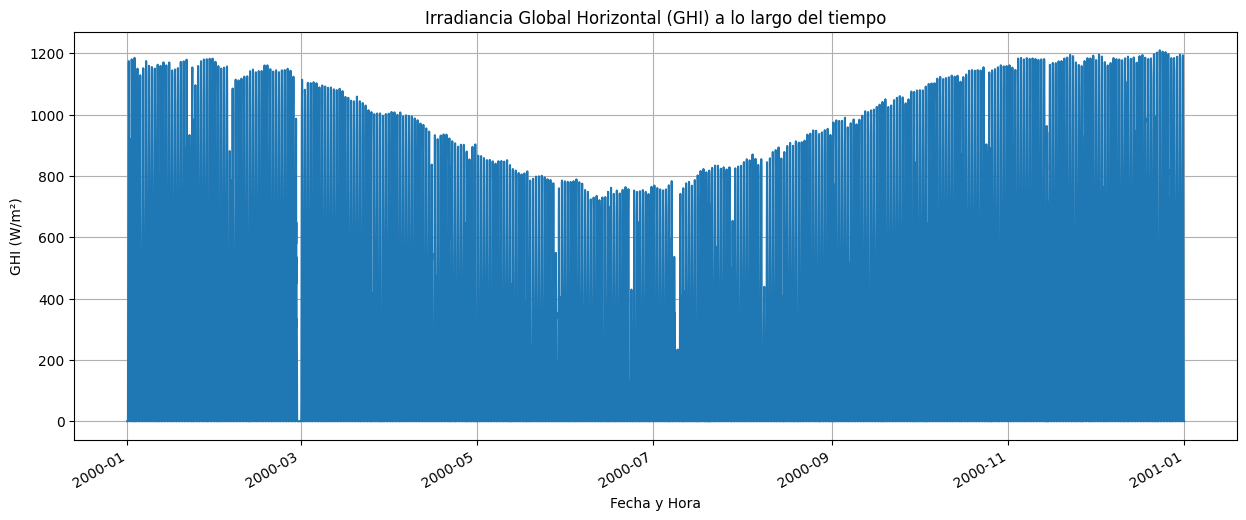

In [6]:
# Graficar GHI a lo largo del tiempo (si existe la columna y el índice es datetime)
# Asume que la columna se llama 'GHI' - ajusta si es necesario
if 'df' in locals() and 'GHI' in df.columns and isinstance(df.index, pd.DatetimeIndex):
    plt.figure(figsize=(15, 6))
    df['GHI'].plot()
    plt.title('Irradiancia Global Horizontal (GHI) a lo largo del tiempo')
    plt.xlabel('Fecha y Hora')
    plt.ylabel('GHI (W/m²)')
    plt.grid(True)
    plt.show()
elif 'df' in locals():
    print("No se puede graficar GHI: columna 'GHI' no encontrada o el índice no es DatetimeIndex.")

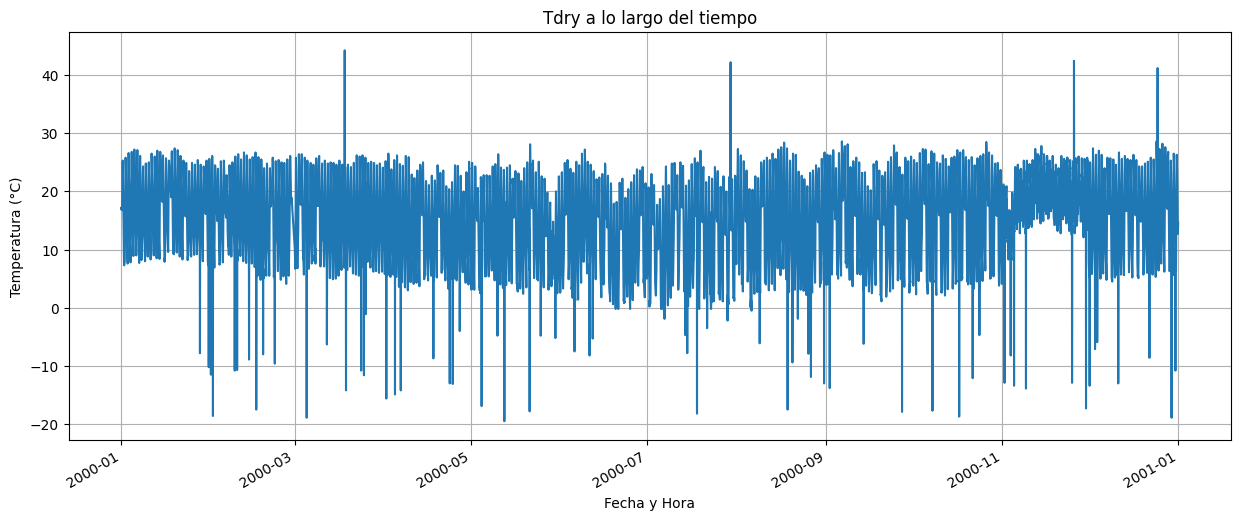

In [7]:
# Graficar Temperatura a lo largo del tiempo (si existe la columna)
# Busca columnas comunes de temperatura
if 'df' in locals() and isinstance(df.index, pd.DatetimeIndex):
    temp_col = None
    possible_temp_cols = ['Tamb', 'Temperature', 'TempC', 'temp_air', 'Tdry'] # <- Añadido 'Tdry'
    for col in possible_temp_cols:
        if col in df.columns:
            temp_col = col
            break

    if temp_col:
        plt.figure(figsize=(15, 6))
        df[temp_col].plot()
        plt.title(f'{temp_col} a lo largo del tiempo')
        plt.xlabel('Fecha y Hora')
        plt.ylabel('Temperatura (°C)') # Ajusta la unidad si es necesario
        plt.grid(True)
        plt.show()
    else:
        print(f"No se puede graficar Temperatura: columna no encontrada (se buscaron {possible_temp_cols}) o el índice no es DatetimeIndex.")
elif 'df' in locals():
     print("No se puede graficar Temperatura: el índice no es DatetimeIndex.")


## 3. Análisis de Correlación


Matriz de Correlación:
                 GHI       DNI       DHI      Tdry      Tdew        RH  \
GHI         1.000000  0.894804  0.362608  0.767819  0.799782  0.104124   
DNI         0.894804  1.000000  0.217786  0.726623  0.755333  0.054518   
DHI         0.362608  0.217786  1.000000  0.353769  0.367439  0.048815   
Tdry        0.767819  0.726623  0.353769  1.000000  0.947789  0.025474   
Tdew        0.799782  0.755333  0.367439  0.947789  1.000000  0.028810   
RH          0.104124  0.054518  0.048815  0.025474  0.028810  1.000000   
Pres        0.530265  0.520304  0.245570  0.764267  0.808382  0.129739   
Wspd        0.284159  0.218341  0.130490  0.192029  0.189498  0.057338   
Wdir        0.474529  0.405101  0.226357  0.447681  0.467979 -0.345403   
Snow Depth       NaN       NaN       NaN       NaN       NaN       NaN   

                Pres      Wspd      Wdir  Snow Depth  
GHI         0.530265  0.284159  0.474529         NaN  
DNI         0.520304  0.218341  0.405101         Na

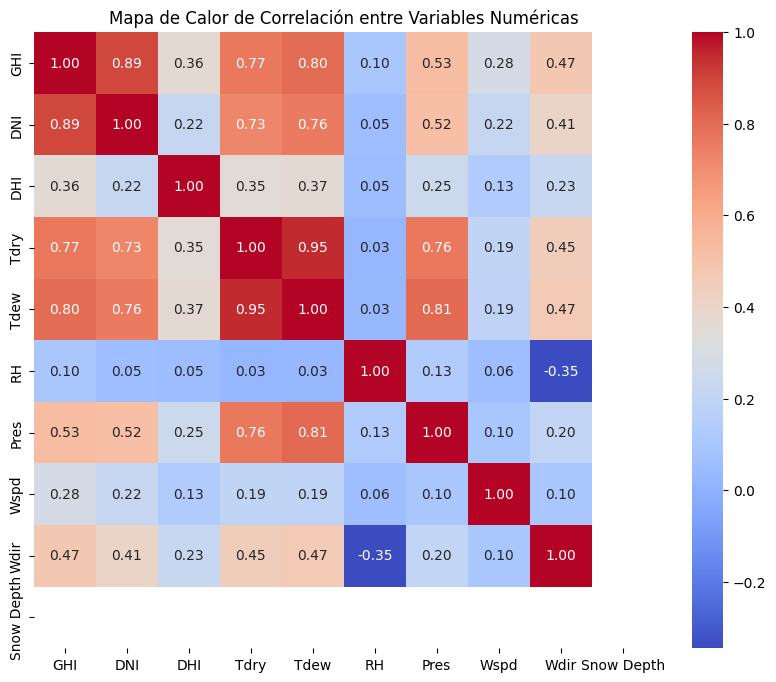

In [8]:
# Calcular la matriz de correlación entre las variables numéricas
if 'df' in locals():
    # Seleccionar solo columnas numéricas antes de calcular correlación
    df_numeric = df.select_dtypes(include='number')
    if not df_numeric.empty:
        correlation_matrix = df_numeric.corr()

        print("\nMatriz de Correlación:")
        print(correlation_matrix)

        # Visualizar la matriz de correlación usando un mapa de calor
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
        plt.show()
    else:
        print("No se encontraron columnas numéricas para calcular la correlación.")

## 4. Agregación Temporal

Calcular estadísticas agrupadas por periodos de tiempo (ej. promedio mensual).


Promedio Mensual de GHI:
Timestamp
2000-01-31    376.373454
2000-02-29    356.829687
2000-03-31    323.652083
2000-04-30    270.951528
2000-05-31    222.746573
2000-06-30    196.747153
2000-07-31    202.677856
2000-08-31    248.385148
2000-09-30    306.508056
2000-10-31    352.998723
2000-11-30    385.088264
2000-12-31    393.796841
Freq: ME, Name: GHI, dtype: float64


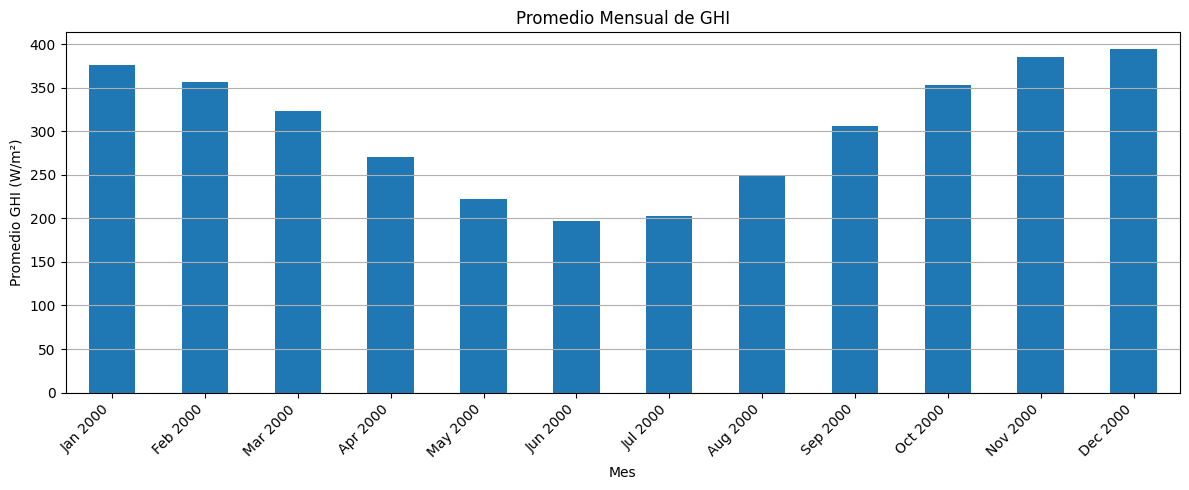

In [9]:
# Calcular el promedio mensual de GHI (si existe la columna y el índice es datetime)
if 'df' in locals() and 'GHI' in df.columns and isinstance(df.index, pd.DatetimeIndex):
    # Usar 'ME' para fin de mes
    monthly_avg_ghi = df['GHI'].resample('ME').mean()

    print("\nPromedio Mensual de GHI:")
    print(monthly_avg_ghi)

    # Graficar el promedio mensual
    plt.figure(figsize=(12, 5))
    monthly_avg_ghi.plot(kind='bar')
    plt.title('Promedio Mensual de GHI')
    plt.xlabel('Mes')
    plt.ylabel('Promedio GHI (W/m²)')
    # Formatear etiquetas del eje x para mostrar Mes-Año
    plt.xticks(ticks=range(len(monthly_avg_ghi)), labels=[d.strftime('%b %Y') for d in monthly_avg_ghi.index], rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout() # Ajusta el layout para evitar superposiciones
    plt.show()
elif 'df' in locals():
    print("No se puede calcular el promedio mensual de GHI: columna 'GHI' no encontrada o el índice no es DatetimeIndex.")


Promedio Diario de Tdry:
Timestamp
2000-01-01    17.533333
2000-01-02    15.950000
2000-01-03    16.479167
2000-01-04    17.043750
2000-01-05    17.650000
Freq: D, Name: Tdry, dtype: float64


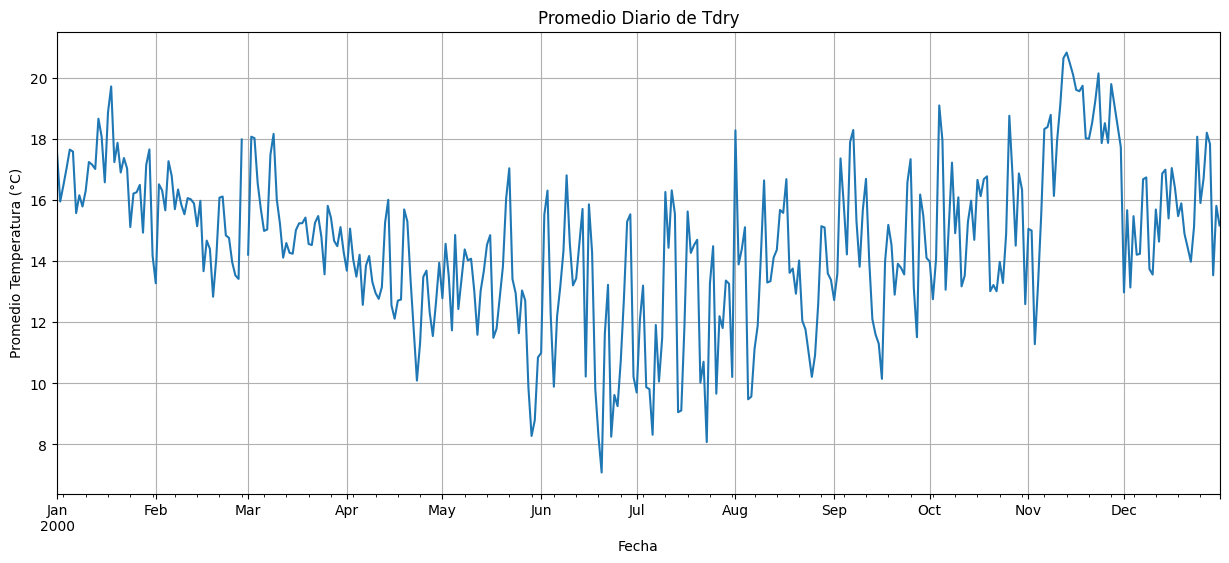

In [10]:
# Calcular el promedio diario de Temperatura (si existe y el índice es datetime)
if 'df' in locals() and temp_col and isinstance(df.index, pd.DatetimeIndex):
    daily_avg_temp = df[temp_col].resample('D').mean()

    print(f"\nPromedio Diario de {temp_col}:")
    print(daily_avg_temp.head()) # Mostrar solo los primeros días

    # Graficar el promedio diario
    plt.figure(figsize=(15, 6))
    daily_avg_temp.plot()
    plt.title(f'Promedio Diario de {temp_col}')
    plt.xlabel('Fecha')
    plt.ylabel('Promedio Temperatura (°C)') # Ajusta unidad si es necesario
    plt.grid(True)
    plt.show()
elif 'df' in locals():
    print(f"No se puede calcular el promedio diario de Temperatura: columna '{temp_col}' no encontrada o el índice no es DatetimeIndex.")


## 5. Variables Derivadas (Usando pvlib)

Calcularemos el ángulo cenital solar (θz), índice de claridad (kt) y la irradiancia en el plano de un arreglo (POA).
**Nota:** Necesitas instalar `pvlib`: `pip install pvlib`

In [19]:
if df is not None:
    try:
        import pvlib
        from pvlib import location
        from pvlib import irradiance
        print(f"pvlib versión {pvlib.__version__} importado correctamente.")

        # --- Definir Ubicación (Antofagasta, Chile) ---
        # Valores aproximados, ajústalos si tienes datos más precisos
        latitud = -23.65
        longitud = -70.40
        altitud = 50 # Metros sobre el nivel del mar (aproximado)
        tz = 'America/Santiago' # Zona horaria

        loc = location.Location(latitud, longitud, tz=tz, altitude=altitud, name='Antofagasta')

        # --- Calcular Posición Solar ---
        # Asegúrate de que el índice es localizado o no tiene zona horaria
        # --- Calcular Posición Solar ---
# Asegúrate de que el índice es localizado o no tiene zona horaria
        if df.index.tz is None:
            # Añadir ambiguous='shift_forward' para manejar cambios de hora
            df_temp_index = df.index.tz_localize(tz, ambiguous='shift_forward')
            print("Localizando índice a zona horaria:", tz, "(manejando horas ambiguas con shift_forward)")
        elif str(df.index.tz) != tz:
            print(f"Advirtiendo: El índice ya tiene zona horaria ({df.index.tz}), pero es diferente a la esperada ({tz}). Intentando convertir...")
            try:
                # La conversión tz_convert no suele necesitar 'ambiguous'
                df_temp_index = df.index.tz_convert(tz)
            except Exception as tz_err:
                print(f"Error al convertir zona horaria: {tz_err}. Usando índice original.")
                df_temp_index = df.index # Volver al original si falla la conversión
        else:
            df_temp_index = df.index # Ya está localizado correctamente
            print("El índice ya está localizado correctamente en:", tz)

        # ... (el resto del código sigue igual) ...

        solar_pos = loc.get_solarposition(df_temp_index)
        # Añadir ángulo cenital (zenith) al DataFrame
        df['solar_zenith'] = solar_pos['apparent_zenith']
        # Corrección: el ángulo cenital debe ser <= 90 durante el día
        df['solar_zenith'] = df['solar_zenith'].clip(upper=90)
        print("Ángulo cenital solar calculado y añadido.")

        # --- Calcular Índice de Claridad (kt) ---
        # 1. Obtener irradiancia extraterrestre (DNI extra)
        dni_extra = irradiance.get_extra_radiation(df_temp_index)
        df['dni_extra'] = dni_extra
        # 2. Calcular kt = GHI / (DNI_extra * cos(zenith))
        # Evitar división por cero o valores inválidos cuando el sol está bajo el horizonte
        cos_zenith = np.cos(np.radians(df['solar_zenith']))
        # Usar un umbral pequeño para evitar división por cero y manejar noche
        denominator = df['dni_extra'] * cos_zenith
        # Asegurarse de que GHI existe antes de usarla
        if 'GHI' in df.columns:
             df['kt'] = np.where(denominator > 1e-6, df['GHI'] / denominator, 0)
             # Limitar kt a un rango razonable (e.g., 0 a 1.1)
             df['kt'] = df['kt'].clip(lower=0, upper=1.1)
             print("Índice de claridad (kt) calculado y añadido.")
        else:
             print("Advertencia: Columna 'GHI' no encontrada. No se puede calcular kt.")


        # --- Calcular Irradiancia en Plano Inclinado (POA) ---
        # Asumir una configuración: inclinación (tilt) y orientación (azimuth)
        surface_tilt = 20 # Grados (ej. igual a latitud aprox)
        surface_azimuth = 0 # Grados (0=Norte, 180=Sur en hemisferio sur)

        # Calcular POA Global (asegurarse que DNI y DHI existen)
        if 'DNI' in df.columns and 'DHI' in df.columns and 'GHI' in df.columns:
            poa_irrad = irradiance.get_total_irradiance(
                surface_tilt=surface_tilt,
                surface_azimuth=surface_azimuth,
                solar_zenith=solar_pos['apparent_zenith'],
                solar_azimuth=solar_pos['azimuth'],
                dni=df['DNI'],
                ghi=df['GHI'],
                dhi=df['DHI'],
                dni_extra=df['dni_extra'],
                model='isotropic' # Modelo simple, otros disponibles: hdkr, perez
            )
            # Extraer componentes POA si es necesario
            # df['poa_direct'] = poa_irrad['poa_direct']
            # df['poa_diffuse'] = poa_irrad['poa_diffuse']
            # df['poa_sky_diffuse'] = poa_irrad['poa_sky_diffuse']
            # df['poa_ground_diffuse'] = poa_irrad['poa_ground_diffuse']
            df['poa_global'] = poa_irrad['poa_global'].fillna(0).clip(lower=0) # Rellenar NaN y asegurar no negativos
            print(f"Irradiancia POA Global (tilt={surface_tilt}°, azim={surface_azimuth}°) calculada y añadida.")
        else:
            print("Advertencia: Faltan columnas DNI, DHI o GHI. No se puede calcular POA.")

        # Mostrar las nuevas columnas (si existen)
        cols_to_show = [col for col in ['GHI', 'DNI', 'DHI', 'solar_zenith', 'dni_extra', 'kt', 'poa_global'] if col in df.columns]
        if cols_to_show:
            print("\nDataFrame con variables derivadas disponibles:")
            print(df[cols_to_show].head())
        else:
            print("\nNo se pudieron calcular/encontrar las variables derivadas para mostrar.")

    except ImportError:
        print("Error: La librería 'pvlib' no está instalada. Ejecuta 'pip install pvlib'")
    except Exception as e:
        print(f"Ocurrió un error calculando variables derivadas: {e}")
        import traceback
        traceback.print_exc() # Imprime más detalles del error
else:
    print("El DataFrame 'df' no está cargado. No se pueden calcular variables derivadas.")

pvlib versión 0.12.0 importado correctamente.
Ocurrió un error calculando variables derivadas: Cannot infer dst time from 2000-03-11 23:00:00, try using the 'ambiguous' argument


Traceback (most recent call last):
  File "/tmp/ipykernel_548249/2079673485.py", line 23, in <module>
    df_temp_index = df.index.tz_localize(tz, ambiguous='shift_forward')
  File "/home/cparrado/.local/lib/python3.10/site-packages/pandas/core/indexes/datetimes.py", line 293, in tz_localize
    arr = self._data.tz_localize(tz, ambiguous, nonexistent)
  File "/home/cparrado/.local/lib/python3.10/site-packages/pandas/core/arrays/_mixins.py", line 81, in method
    return meth(self, *args, **kwargs)
  File "/home/cparrado/.local/lib/python3.10/site-packages/pandas/core/arrays/datetimes.py", line 1088, in tz_localize
    new_dates = tzconversion.tz_localize_to_utc(
  File "tzconversion.pyx", line 371, in pandas._libs.tslibs.tzconversion.tz_localize_to_utc
pytz.exceptions.AmbiguousTimeError: Cannot infer dst time from 2000-03-11 23:00:00, try using the 'ambiguous' argument


## 6. Agregaciones Temporales (Adicionales)


Suma Mensual de GHI (kWh/m²):
Timestamp
2000-01-31    280.021850
2000-02-29    239.789550
2000-03-31    240.797150
2000-04-30    195.085100
2000-05-31    165.723450
2000-06-30    141.657950
2000-07-31    150.792325
2000-08-31    184.798550
2000-09-30    220.685800
2000-10-31    262.631050
2000-11-30    277.263550
2000-12-31    292.984850
Freq: ME, Name: GHI, dtype: float64


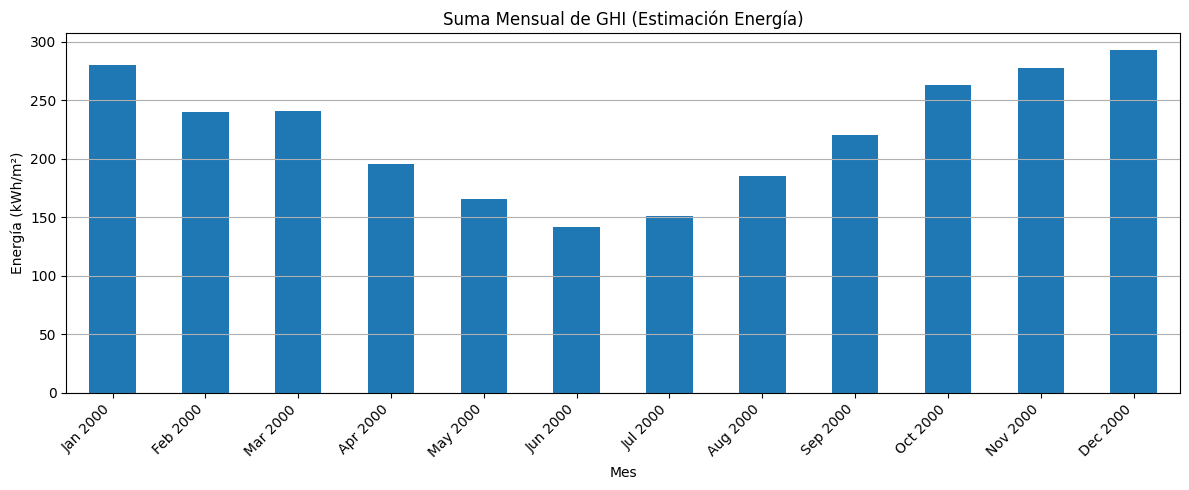


Promedio Estacional de Tdry:
Season
Verano       15.922014
Otoño        13.873766
Invierno     12.693139
Primavera    15.892960
Name: Tdry, dtype: float64


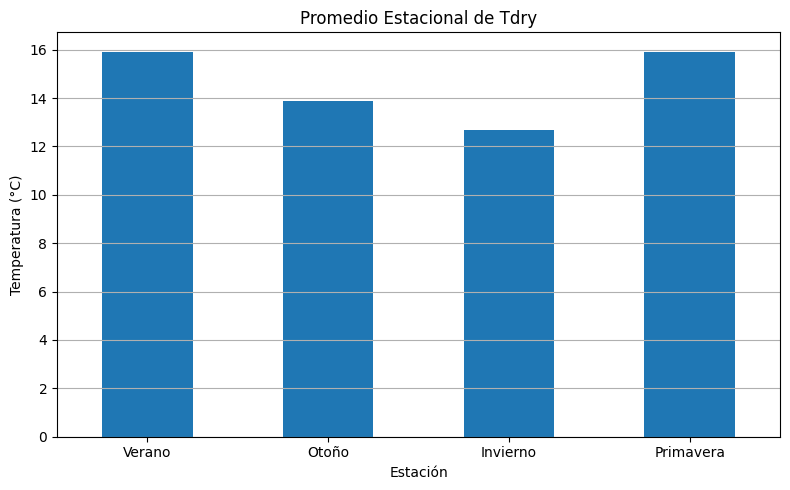

In [12]:
if df is not None and isinstance(df.index, pd.DatetimeIndex):
    # --- Suma Mensual (Ejemplo: Energía - asumiendo GHI como proxy) ---
    # Si GHI está en W/m², la suma horaria es Wh/m²
    if 'GHI' in df.columns:
        monthly_sum_ghi = df['GHI'].resample('ME').sum() / 1000 # Convertir a kWh/m²

        print("\nSuma Mensual de GHI (kWh/m²):")
        print(monthly_sum_ghi)

        monthly_sum_ghi.plot(kind='bar', figsize=(12, 5))
        plt.title('Suma Mensual de GHI (Estimación Energía)')
        plt.ylabel('Energía (kWh/m²)')
        plt.xlabel('Mes')
        plt.xticks(ticks=range(len(monthly_sum_ghi)), labels=[d.strftime('%b %Y') for d in monthly_sum_ghi.index], rotation=45, ha='right')
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

    # --- Promedio Estacional (Ejemplo: Temperatura) ---
    # Re-identificar temp_col por si acaso
    temp_col = None
    possible_temp_cols = ['Tamb', 'Temperature', 'TempC', 'temp_air', 'Tdry']
    for col in possible_temp_cols:
        if col in df.columns:
            temp_col = col
            break

    if temp_col:
        # Definir trimestres (Hemisferio Sur)
        # Verano: Dic-Feb (12, 1, 2), Otoño: Mar-May (3, 4, 5),
        # Invierno: Jun-Ago (6, 7, 8), Primavera: Sep-Nov (9, 10, 11)
        # Mapeo simple usando el mes
        def get_season(month):
            if month in [12, 1, 2]: return 'Verano'
            if month in [3, 4, 5]: return 'Otoño'
            if month in [6, 7, 8]: return 'Invierno'
            if month in [9, 10, 11]: return 'Primavera'
            return ''

        df['Season'] = df.index.month.map(get_season)
        seasonal_avg_temp = df.groupby('Season')[temp_col].mean()
        # Ordenar estaciones
        season_order = ['Verano', 'Otoño', 'Invierno', 'Primavera']
        seasonal_avg_temp = seasonal_avg_temp.reindex(season_order)

        print(f"\nPromedio Estacional de {temp_col}:")
        print(seasonal_avg_temp)

        seasonal_avg_temp.plot(kind='bar', figsize=(8, 5))
        plt.title(f'Promedio Estacional de {temp_col}')
        plt.ylabel('Temperatura (°C)')
        plt.xlabel('Estación')
        plt.xticks(rotation=0)
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()
    else:
        print("No se encontró columna de temperatura para análisis estacional.")

else:
    print("El DataFrame 'df' no está cargado o el índice no es DatetimeIndex.")

## 7. Heatmaps de Irradiancia y Temperatura

Visualizan patrones promedio a lo largo del día y del año.

Error al crear heatmap GHI: name 'np' is not defined
Error al crear heatmap de Temperatura: name 'np' is not defined


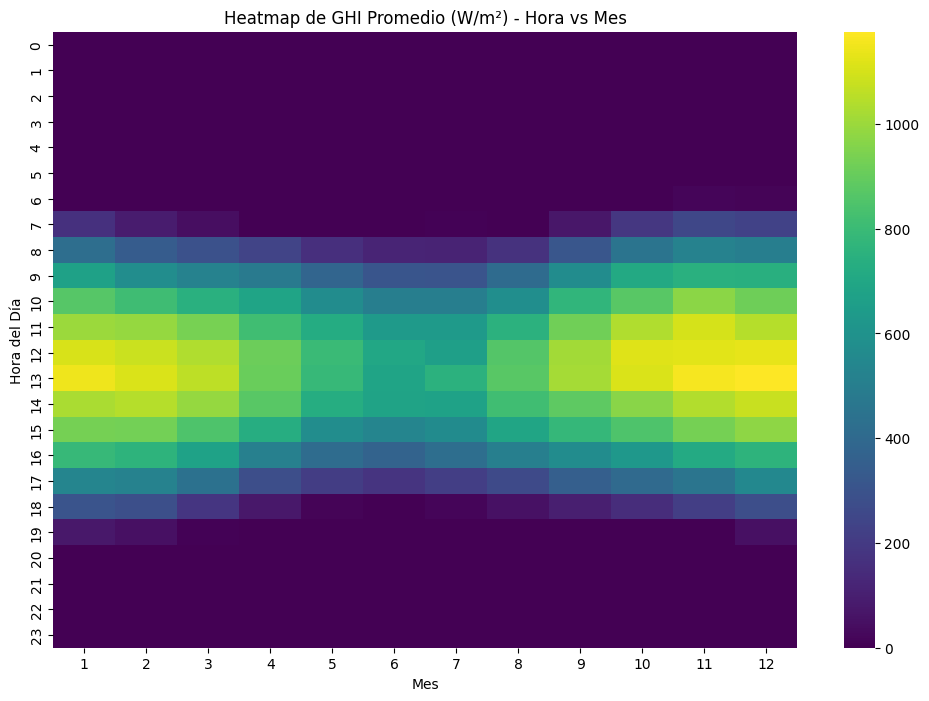

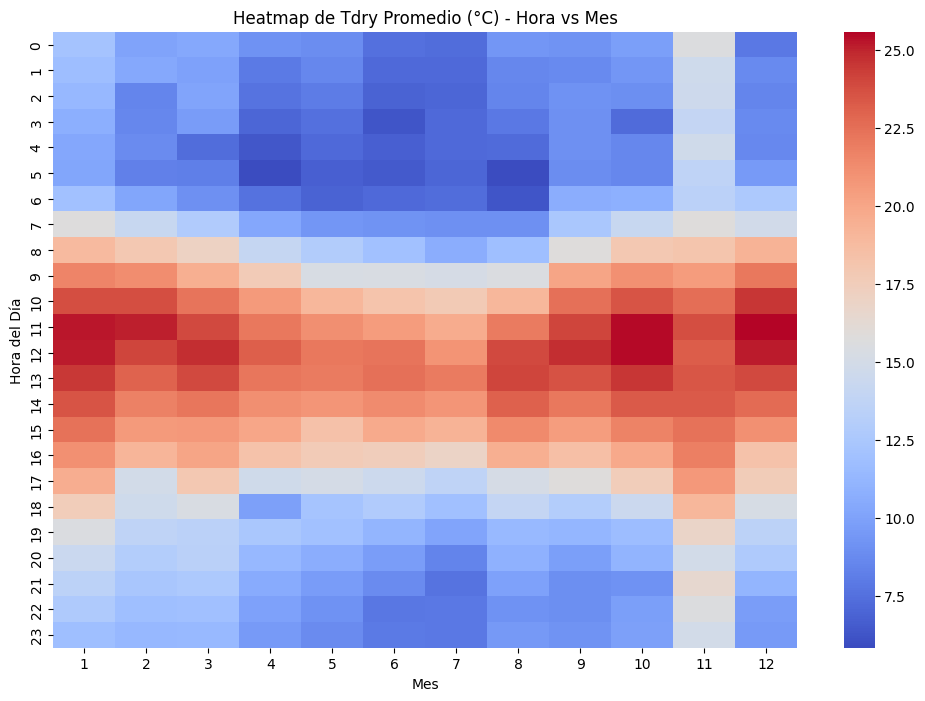

In [13]:
if df is not None and isinstance(df.index, pd.DatetimeIndex):
    # --- Heatmap de GHI Promedio (Hora vs Mes) ---
    if 'GHI' in df.columns:
        # Crear columnas para Hora y Mes si no existen
        if 'Hour' not in df.columns:
             df['Hour'] = df.index.hour
        if 'Month' not in df.columns:
             df['Month'] = df.index.month

        # Pivotear para obtener GHI promedio por hora y mes
        try:
             heatmap_data_ghi = df.pivot_table(values='GHI', index='Hour', columns='Month', aggfunc='mean')

             plt.figure(figsize=(12, 8))
             sns.heatmap(heatmap_data_ghi, cmap='viridis', annot=False) # annot=True puede ser demasiado denso
             plt.title('Heatmap de GHI Promedio (W/m²) - Hora vs Mes')
             plt.xlabel('Mes')
             plt.ylabel('Hora del Día')
             # Asegurar que todos los meses estén presentes
             plt.xticks(ticks=np.arange(0.5, 12.5), labels=range(1,13))
             plt.yticks(rotation=0)
             plt.show()
        except Exception as e_pivot_ghi:
             print(f"Error al crear heatmap GHI: {e_pivot_ghi}")

    # --- Heatmap de Temperatura Promedio (Hora vs Mes) ---
    # Re-identificar temp_col
    temp_col = None
    possible_temp_cols = ['Tamb', 'Temperature', 'TempC', 'temp_air', 'Tdry']
    for col in possible_temp_cols:
        if col in df.columns:
            temp_col = col
            break

    if temp_col:
         # Crear columnas para Hora y Mes si no existen
         if 'Hour' not in df.columns:
             df['Hour'] = df.index.hour
         if 'Month' not in df.columns:
             df['Month'] = df.index.month

         try:
             heatmap_data_temp = df.pivot_table(values=temp_col, index='Hour', columns='Month', aggfunc='mean')

             plt.figure(figsize=(12, 8))
             sns.heatmap(heatmap_data_temp, cmap='coolwarm', annot=False)
             plt.title(f'Heatmap de {temp_col} Promedio (°C) - Hora vs Mes')
             plt.xlabel('Mes')
             plt.ylabel('Hora del Día')
             plt.xticks(ticks=np.arange(0.5, 12.5), labels=range(1,13))
             plt.yticks(rotation=0)
             plt.show()
         except Exception as e_pivot_temp:
             print(f"Error al crear heatmap de Temperatura: {e_pivot_temp}")
    else:
        print("No se encontró columna de temperatura para heatmap.")

else:
    print("El DataFrame 'df' no está cargado o el índice no es DatetimeIndex.")


## 8. Histogramas de Distribuciones Clave

In [14]:
if df is not None:
    # --- Histogramas ---
    # Re-identificar temp_col
    temp_col = None
    possible_temp_cols = ['Tamb', 'Temperature', 'TempC', 'temp_air', 'Tdry']
    for col in possible_temp_cols:
        if col in df.columns:
            temp_col = col
            break

    variables_to_plot = ['GHI', 'DNI', 'DHI']
    if temp_col: # Añadir la columna de temperatura detectada si existe
        variables_to_plot.append(temp_col)
    if 'kt' in df.columns: # Añadir kt si se calculó
        variables_to_plot.append('kt')
    if 'poa_global' in df.columns: # Añadir poa_global si se calculó
        variables_to_plot.append('poa_global')


    # Filtrar solo las variables que realmente existen en el DataFrame
    variables_existentes = [var for var in variables_to_plot if var in df.columns]

    if variables_existentes:
        num_plots = len(variables_existentes)
        # Ajustar layout de subplots dinámicamente
        num_cols = 3 if num_plots > 4 else 2
        num_rows = int(np.ceil(num_plots / num_cols))

        plt.figure(figsize=(5 * num_cols, 4 * num_rows))

        for i, var in enumerate(variables_existentes):
            plt.subplot(num_rows, num_cols, i + 1)
            # Filtrar NaNs o infs si los hubiera antes de graficar
            data_to_plot = df[var].dropna()
            data_to_plot = data_to_plot[~np.isinf(data_to_plot)]
            if not data_to_plot.empty:
                 sns.histplot(data_to_plot, kde=True, bins=50) # kde añade una curva de densidad
                 plt.title(f'Distribución de {var}')
                 plt.xlabel(var)
                 plt.ylabel('Frecuencia')
            else:
                 plt.title(f'Distribución de {var} (Datos vacíos/inválidos)')
                 print(f"Advertencia: No hay datos válidos para graficar el histograma de '{var}'.")


        plt.tight_layout()
        plt.show()
    else:
        print("No se encontraron variables clave ('GHI', 'DNI', 'DHI', 'Tdry', 'kt', 'poa_global') en el DataFrame para generar histogramas.")

else:
    print("El DataFrame 'df' no está cargado.")

NameError: name 'np' is not defined